In [1]:
import numpy as np
from matplotlib import pyplot as plt

from utilities import complete_panel, myblue, myred

In [2]:
paths = ["lammps_25part_1.7nm3_300K_NVT/", "python_25part_1.7nm3_300K_NVT/"]
legends = ["LAMMPS", "Python"]

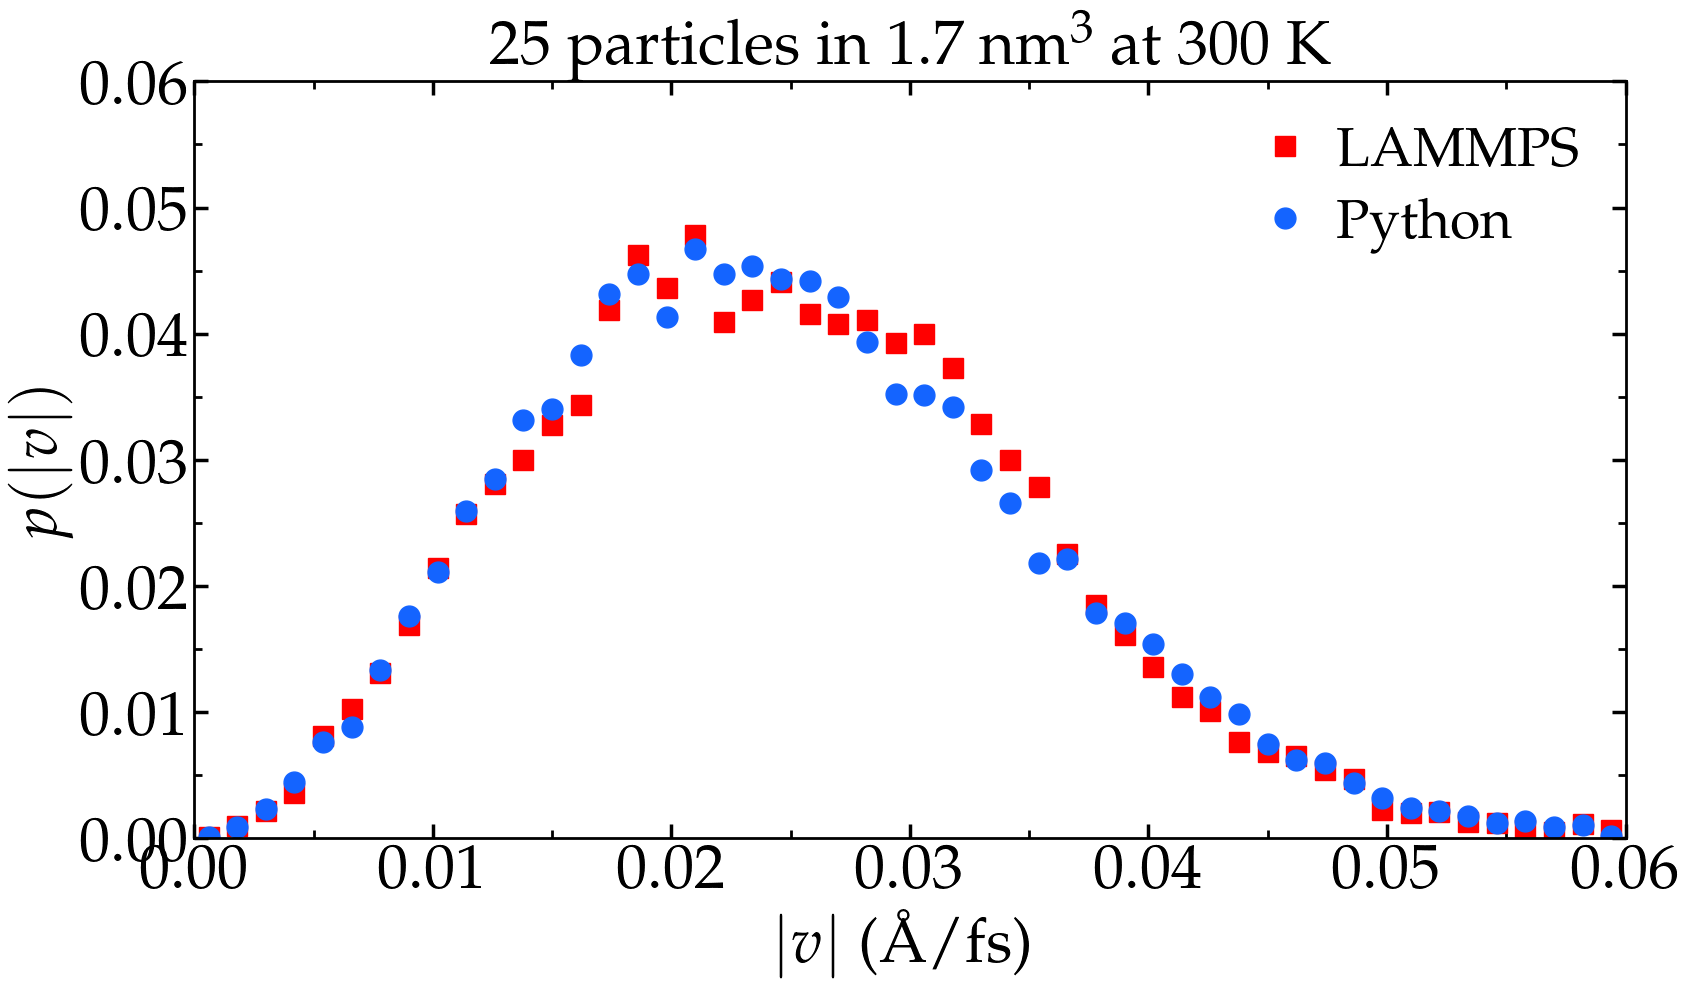

In [3]:
fig = plt.figure(figsize=(17,10))

ax = []
n = 0
l_tot = 1
c_tot = 1

x_boundaries = 0, 0.06
x_ticks = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
y_boundaries = 0, 0.06
y_ticks = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]

n += 1
ax.append(plt.subplot(l_tot, c_tot, n))

for path, legend, color, symbol in zip(paths, legends, [myred, myblue], ["s", "o"]):
    dump = path + "dump.lammpstrj"
    file = open(dump, "r")
    velocity = []
    norm_velocity = []
    for line in file:
        try:
            id, type, x, y, z, vx, vy, vz = np.float32(line.split())
            velocity.append([vx, vy, vz])
            norm_velocity.append(np.sqrt(vx**2+vy**2+vz**2))
        except:
            pass

    proba, vel = np.histogram(norm_velocity[100:], bins=50, range=(x_boundaries))
    vel = (vel[1:]+vel[:-1])/2
    proba = proba/np.sum(proba)

    ax[-1].plot(vel, proba, symbol, color=color, markersize=15, label=legend)

plt.xlim(x_boundaries)
plt.xticks(x_ticks)
plt.ylim(y_boundaries)
plt.yticks(y_ticks)

complete_panel(ax[-1], r'$|v|$ (\AA/fs)', r'$p (|v|)$', legend=True, title="25 particles in 1.7 nm$^3$ at 300 K")

fig.tight_layout()
plt.savefig('velocity_distribution_300K.png', bbox_inches = 'tight', pad_inches = 0.062)
plt.show()

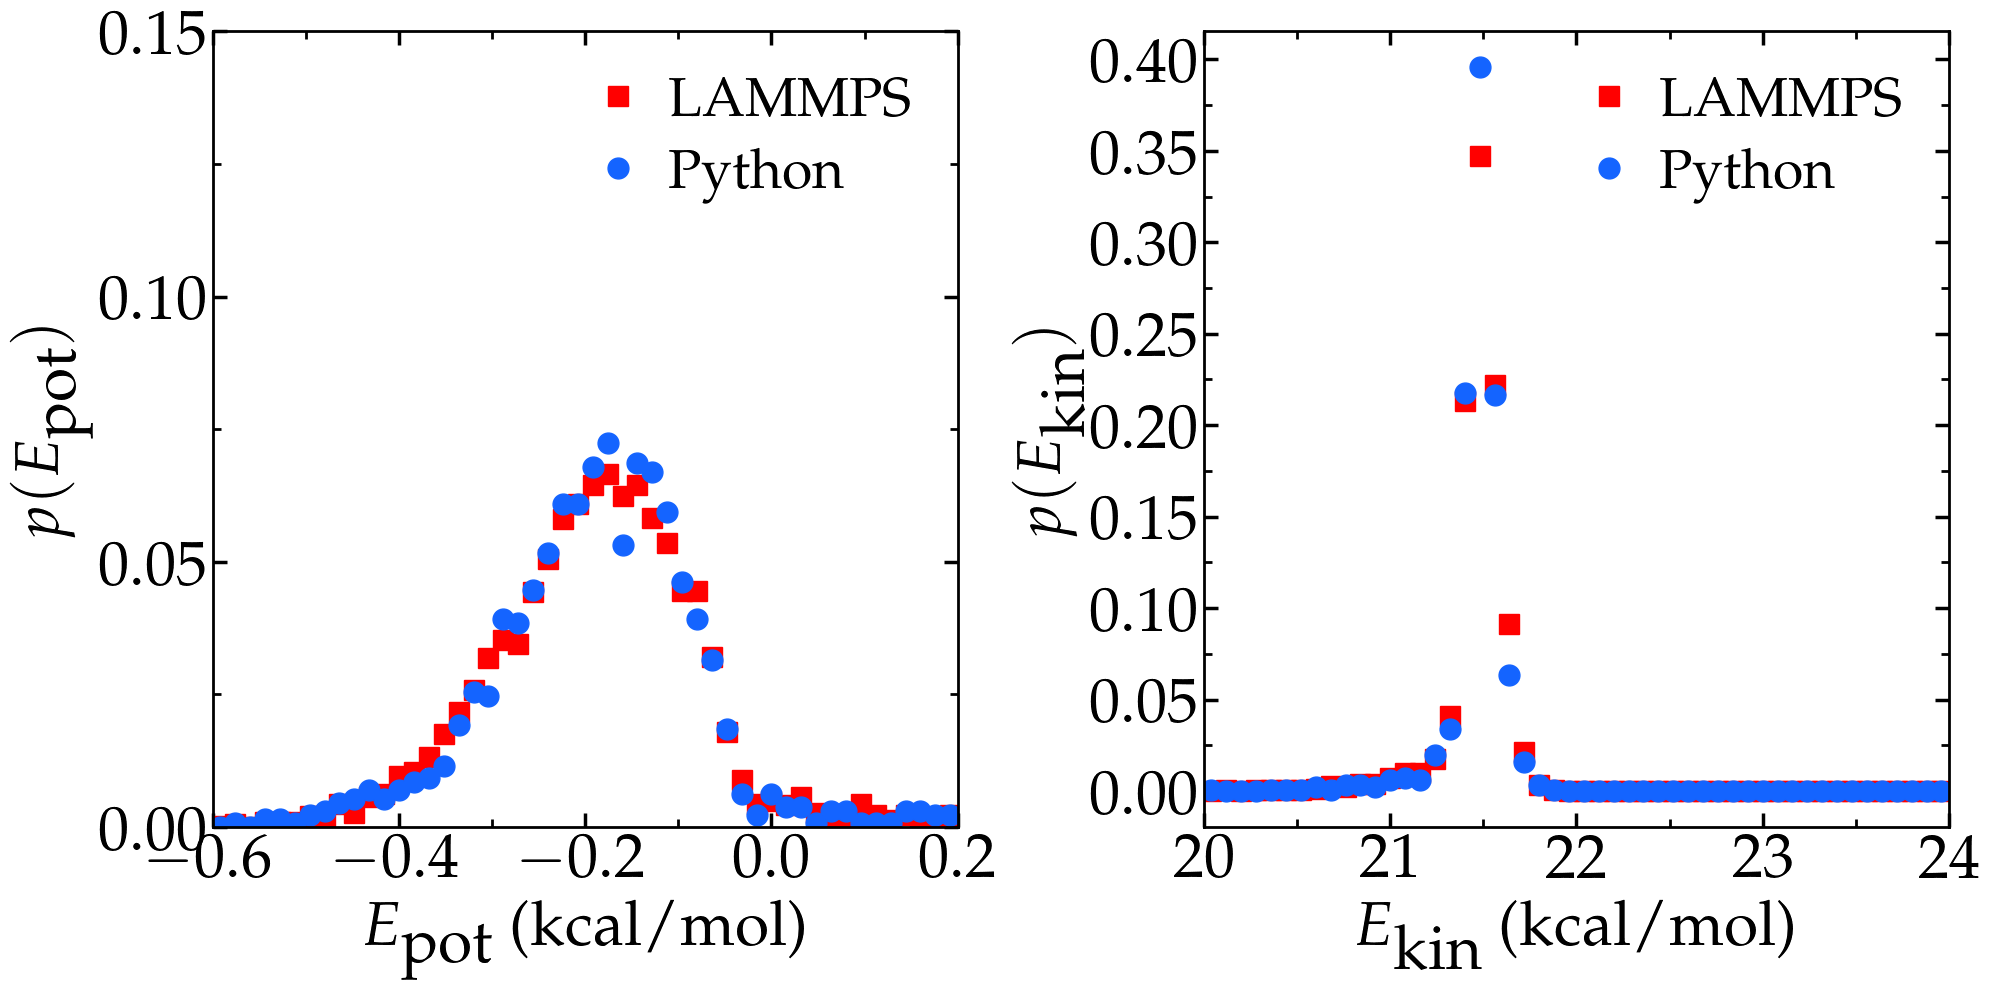

In [4]:
fig = plt.figure(figsize=(20,10))

ax = []
n = 0
l_tot = 1
c_tot = 2

x_boundaries = -0.6, 0.2
x_ticks = [-0.6, -0.4, -0.2, 0.0, 0.2]
y_boundaries = 0, 0.15
y_ticks = [0, 0.05, 0.1, 0.15]

n += 1
ax.append(plt.subplot(l_tot, c_tot, n))

for path, legend, color, symbol in zip(paths, legends, [myred, myblue], ["s", "o"]):
    data = path + "Epot.dat"
    file = open(data, "r")
    steps, Epot = np.loadtxt(file).T

    proba, energy = np.histogram(Epot, bins=50, range=(x_boundaries))
    energy = (energy[1:]+energy[:-1])/2
    proba = proba/np.sum(proba)

    ax[-1].plot(energy, proba, symbol, color=color, markersize=15, label=legend)

plt.xlim(x_boundaries)
plt.xticks(x_ticks)
plt.ylim(y_boundaries)
plt.yticks(y_ticks)

complete_panel(ax[-1], r'$E_\textrm{pot}$ (kcal/mol)', r'$p (E_\textrm{pot})$', legend=True)

x_boundaries = 20, 24
x_ticks = [20, 21, 22, 23, 24]
y_boundaries = 0, 0.2
y_ticks = [0, 0.05, 0.1, 0.15, 0.2]

n += 1
ax.append(plt.subplot(l_tot, c_tot, n))

for path, legend, color, symbol in zip(paths, legends, [myred, myblue], ["s", "o"]):
    data = path + "Ekin.dat"
    file = open(data, "r")
    _, Ekin = np.loadtxt(file).T

    proba, energy = np.histogram(Ekin[10:], bins=50, range=(x_boundaries))
    energy = (energy[1:]+energy[:-1])/2
    proba = proba/np.sum(proba)

    ax[-1].plot(energy, proba, symbol, color=color, markersize=15, label=legend)

plt.xlim(x_boundaries)
plt.xticks(x_ticks)
#plt.ylim(y_boundaries)
#plt.yticks(y_ticks)

complete_panel(ax[-1], r'$E_\textrm{kin}$ (kcal/mol)', r'$p (E_\textrm{kin})$', legend=True)

fig.tight_layout()
plt.savefig('energies_300K.png', bbox_inches = 'tight', pad_inches = 0.062)
plt.show()

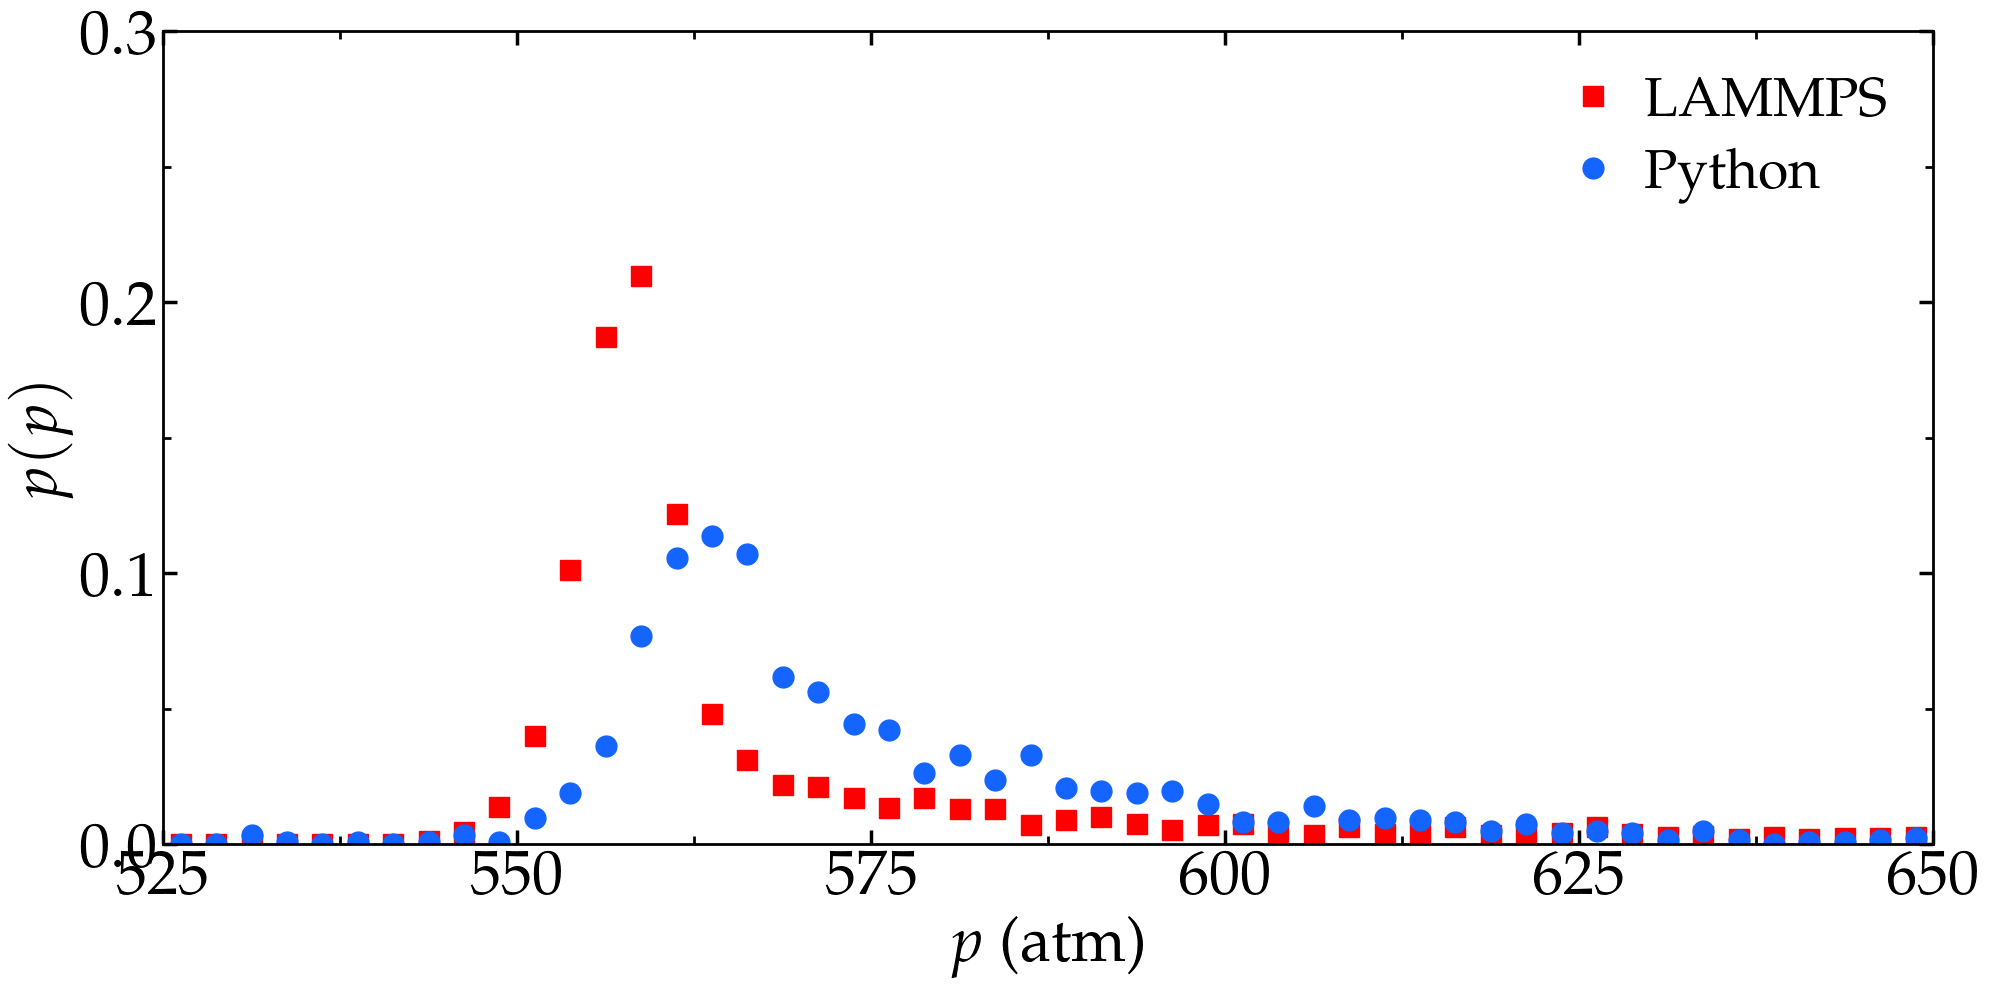

In [5]:
fig = plt.figure(figsize=(20,10))

ax = []
n = 0
l_tot = 1
c_tot = 1

x_boundaries = 525, 650
x_ticks = [525, 550, 575, 600, 625, 650]
y_boundaries = 0, 0.3
y_ticks = [0, 0.1, 0.2, 0.3]

n += 1
ax.append(plt.subplot(l_tot, c_tot, n))

for path, legend, color, symbol in zip(paths, legends, [myred, myblue], ["s", "o"]):
    data = path + "pressure.dat"
    file = open(data, "r")
    steps, press = np.loadtxt(file).T

    proba, pressure = np.histogram(press[10:], bins=50, range=(x_boundaries))
    pressure = (pressure[1:]+pressure[:-1])/2
    proba = proba/np.sum(proba)

    ax[-1].plot(pressure, proba, symbol, color=color, markersize=15, label=legend)

plt.xlim(x_boundaries)
plt.xticks(x_ticks)
plt.ylim(y_boundaries)
plt.yticks(y_ticks)

complete_panel(ax[-1], r'$p$ (atm)', r'$p (p)$', legend=True)

fig.tight_layout()
plt.savefig('pressures_300K.png', bbox_inches = 'tight', pad_inches = 0.062)
plt.show()

In [6]:
paths = ["lammps_mu2_1.7nm3_300K_GCMC/", "python_mu2_1.7nm3_300K_GCMC/"]
legends = ["LAMMPS", "Python"]

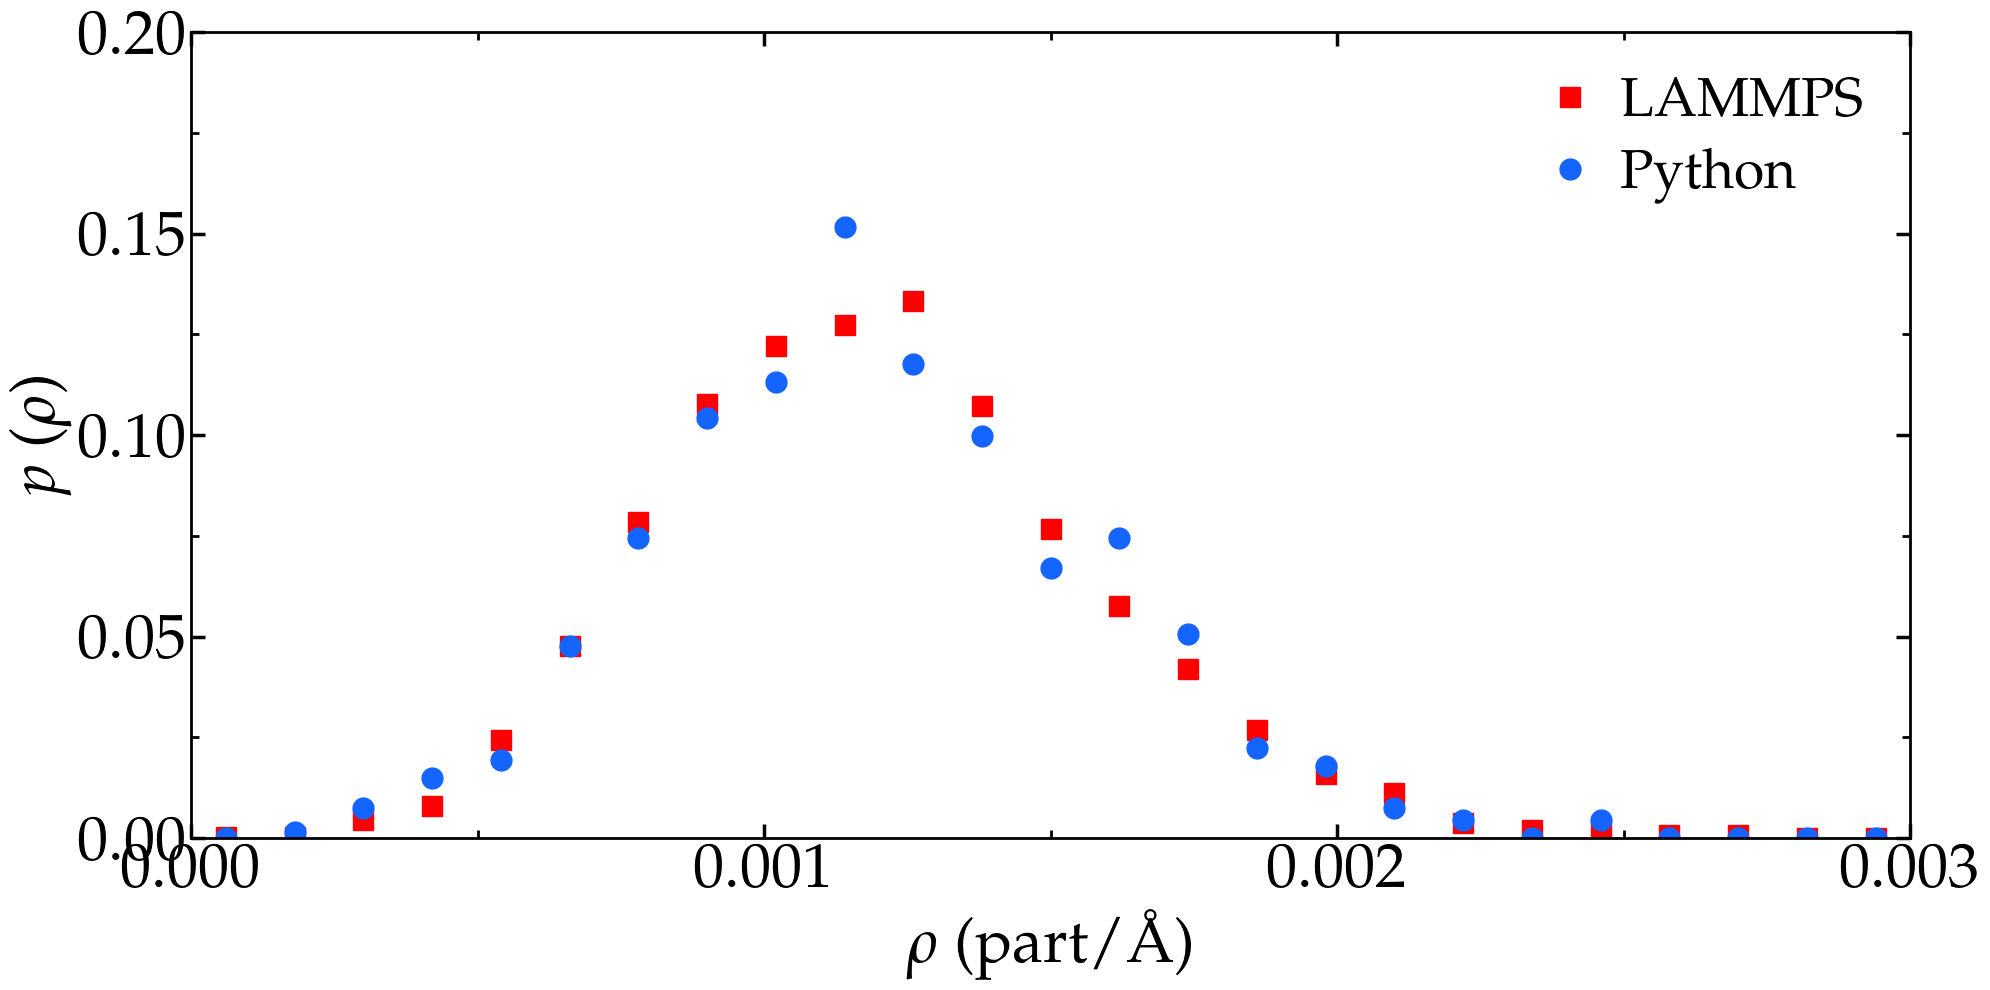

In [12]:
fig = plt.figure(figsize=(20,10))

ax = []
n = 0
l_tot = 1
c_tot = 1

x_boundaries = 0.0, 0.003
x_ticks = [0, 0.001, 0.002, 0.003]
y_boundaries = 0, 0.2
y_ticks = [0, 0.05, 0.1, 0.15, 0.2]

n += 1
ax.append(plt.subplot(l_tot, c_tot, n))

for path, legend, color, symbol in zip(paths, legends, [myred, myblue], ["s", "o"]):
    data = path + "density.dat"
    file = open(data, "r")
    steps, dens = np.loadtxt(file).T

    proba, density = np.histogram(dens[10:], bins=25, range=(x_boundaries))
    density = (density[1:]+density[:-1])/2
    proba = proba/np.sum(proba)

    ax[-1].plot(density, proba, symbol, color=color, markersize=15, label=legend)

plt.xlim(x_boundaries)
plt.xticks(x_ticks)
plt.ylim(y_boundaries)
plt.yticks(y_ticks)

complete_panel(ax[-1], r'$\rho$ (part/\AA)', r'$p$ ($\rho$)', legend=True)

fig.tight_layout()
plt.savefig('density_300K_2kcalmol.png', bbox_inches = 'tight', pad_inches = 0.062)
plt.show()